# Making the plot

The training was based on 20 tasks of permuted MNIST, 3000 samples for each task.
Also 10 tasks of Cifar100, 2500 samples for each task.

There are two ways to do the comparison. 

In [1]:
import torch
import matplotlib.pyplot as plt

torch_file = "gem_cifar100_20.pt_2020_03_04_02_54_50_2fad8f6951004669b0898a0ba0f9d339.pt"
samples_per_task = 2500 # MNIST permutation: 3000; cifar100: 2500
batch_size = 10 # MNIST permutation: 1; cifar100: 10
batch_per_task = int(samples_per_task / batch_size)

all_data = torch.load(torch_file, map_location = "cpu")

## The first is to compare two tasks directly. And there would be a dot product at each minibatch.

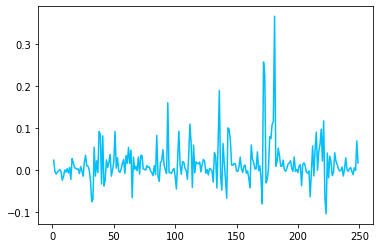

In [4]:
# indexes of two tasks to do the comparison(t_idx_1 < t_idx_2)
t_idx_1 = 1 
t_idx_2 = 14

dotp = []
batches = []
for i, item in enumerate(all_data[2][batch_per_task*(t_idx_2-1):batch_per_task*t_idx_2-1].tolist()):
    batches.append(i+1)
    dotp.append(item[t_idx_1-1])
    
plt.plot(batches, dotp, 'deepskyblue')

 ## The second one is to compare a certain task with all the following tasks. The average is taken of all samples to represent a certain task.

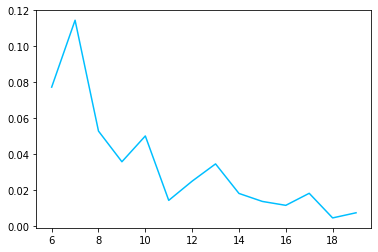

In [7]:
t_idx = 5 # index of the task to do the comparison

tasks = []
dotp = []
temp_sum = 0
task_num = t_idx + 1

for i, item in enumerate(all_data[2][batch_per_task*(task_num-1):].tolist()):
    if i % batch_per_task == 0 and i > 0:
        tasks.append(task_num)
        dotp.append(temp_sum / batch_per_task)
        temp_sum = 0
        task_num = i / batch_per_task + t_idx + 1
    
    temp_sum += item[t_idx-1]

plt.plot(tasks, dotp, 'deepskyblue')

In [37]:
all_data

(tensor([0., 0., 0., 0., 1., 1., 1., 2., 2., 2., 3., 3., 3., 4., 4., 4., 5., 5.,
         5., 6., 6., 6., 7., 7., 7., 8., 8., 8., 9., 9., 9.]),
 tensor([[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.0660, 0.1000,
          0.1000],
         [0.2380, 0.0960, 0.0850, 0.1000, 0.0900, 0.1000, 0.0750, 0.0940, 0.0520,
          0.1210],
         [0.2430, 0.1060, 0.1100, 0.1040, 0.0830, 0.1000, 0.0970, 0.1440, 0.0740,
          0.1160],
         [0.2920, 0.1030, 0.1260, 0.1040, 0.0940, 0.1000, 0.0820, 0.1320, 0.1060,
          0.1030],
         [0.3180, 0.1990, 0.0850, 0.0810, 0.1040, 0.1010, 0.1280, 0.1500, 0.0770,
          0.0940],
         [0.2920, 0.3080, 0.0760, 0.1050, 0.0840, 0.0960, 0.1040, 0.1060, 0.0920,
          0.0900],
         [0.3110, 0.2570, 0.1120, 0.1000, 0.0770, 0.0980, 0.0850, 0.1130, 0.1410,
          0.0910],
         [0.3580, 0.3450, 0.3140, 0.1090, 0.1030, 0.1030, 0.0930, 0.0990, 0.1010,
          0.0850],
         [0.3620, 0.3320, 0.3440, 0.1200, 0.1070